# Qiskit Summer School 2021
## Day 2 Lecture 1


These are my personal notes & interpretations of the lectures done on the first day of the 2021 Qiskit summer school.

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
\newcommand{\ketbra}[2]{\left|{#1}\middle\rangle\langle{#2}\right|}
\newenvironment{rcases}
  {\left.\begin{aligned}}
  {\end{aligned}\right\rbrace}
$$

In [3]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

#### Deutsch-Jozsa algorithm

**Oracles**

_Situation:_ We have acces to an _oracle_ (physical black box) that we cannot look inside. The oracle can receive queries and returns answers.
We now want to determine some property of the oracle using the least amount of queries.

- In a classical computer, such an oracle is defined as a function $f:\{0,1\}^n \rightarrow \{0,1\}^m$, which takes in an _input string_ and outputs an _output string_.
- On a quantum computer, the oracle must be reversible (remember quantum theory!)

$x: n$ qubits and $y: m$ qubits as input of $O_f$ (oracle) that outputs $x$ and $y \oplus f(x)$

$O_f$ is a _bit oracle_ and can be seen as unitary. It performs on the map $O_f\ket{x}\ket{y} = \ket{x}\ket{y\oplus f(x)}$

for $f:\{0,1\}^n \rightarrow \{0,1\}$ we can construct $U_f$ so that

as input we take qubit $x$ and we get qubit $U_f\ket{x}$  as output. The oracle lives inside the function $U_f$ and has an internal _input_ that is qubit $y$ of the form $y = \frac{1}{\sqrt{2}}\left(\ket{0}-\ket{1}\right)$, also called the _ancilla qubit_


#### Calculations

$$
O_f \ket{x} \ket{y} = \frac{1}{\sqrt{2}} \left( \ket{x} \ket{0 \oplus f(x)} - \ket{x} \ket{1 \oplus f(x)}\right)\\
= \begin{cases} 
      \frac{1}{\sqrt{2}}\left(\ket{0}-\ket{1}\right) = \ket{x}\ket{y}, \text{if} \ f(x) = 0 \\
      \frac{1}{\sqrt{2}}\left(\ket{1}-\ket{0}\right) = -\ket{x}\ket{y}, \text{if} \ f(x) = 1 \\
   \end{cases} \\
   \\
\Rightarrow (-1)^{f(x)}\ket{x}\ket{y}
$$

This shows that the whole construct is _independent_ of $y$, which is why we call in an _ancilla qubit_ $\Rightarrow U_f$ is a _phase oracle_ (only adds a phase), which performs the map $U_f\ket{x} = (-1)^{f(x)}\ket{x}$



#### Hadamard on _n_ qubits

_Recall:_ $H\ket{0} = \ket{+}$ and $H\ket{1} = \ket{-}$

for $\ket{x} = \ket{01}:$

$$
\begin{rcases} 
\ket{0} \rightarrow H \rightarrow \ket{+} \\
\ket{1} \rightarrow H \rightarrow \ket{-}
\end{rcases} \ket{y} = \ket{+} \otimes \ket{-} = \frac{1}{2} \left(\ket{00} - \ket{10} + \ket{10} - \ket{11}\right)
$$

In a generalized form:

$$
\ket{x} = \left\{\!\begin{aligned}
    \ket{x_0} \rightarrow H \rightarrow \ket{y_0} \\
    \ket{x_1} \rightarrow H \rightarrow \ket{y_1} \\
    ... \\
    \ket{x_{n-1}} \rightarrow H \rightarrow \ket{y_{n-1}} \\
\end{aligned}\right\} 
\ket{y} = H^{\otimes b}\ket{x} = \frac{1}{\sqrt{2}}\Sigma_{k \in \{0,1\}^n} (-1)^{k\cdot x}\ket{k}
$$

As every $\ket{y_i}$ is either $\ket{+}$ or $\ket{-}$, $\ket{y}$ must be a superposition of all possible $2^n$ bit strings. Lets look at it in the form of a circuit:

#### Deutsch-Jozsa algorithm, for real now

We receive a function $f:\{0,1\}^n \rightarrow \{0,1\}$ that is realized by an oracle. Of the oracle, we know that it is either _constant_ (all inputs map to the same output), or _balanced_ (the amount of inputs that map to 0 and 1 is equal)

The goal is to determine whether $f$ is constant or _balanced_

**The classical solution** needs to ask the oracle atleast _twice_, but if we get the same output again, we need to ask once more. So at most $\frac{N}{2}+1 = 2^{n-1}+1$ queries. Where $n$ is the number of input bits and $N = 2^n$ the amount of realizable bit strings. This means we need between $2$ and $2^{n-1}+1$ queries!

**The quantum solution** needs only one query! The circuit is as follows:

$$
n \text{ qubits }
\left\{\!\begin{aligned}
    \ket{0} \rightarrow H \rightarrow \ket{y_0} \\
    \ket{x_1} \rightarrow H \rightarrow \ket{y_1} \\
    ... \\
    \ket{x_{n-1}} \rightarrow H \rightarrow \ket{y_{n-1}} \\
\end{aligned}\right\} y
$$

To better visualize it, lets build a circuit. The barriers represent the states $\ket{\psi_0}$ to $\ket{\psi_3}$




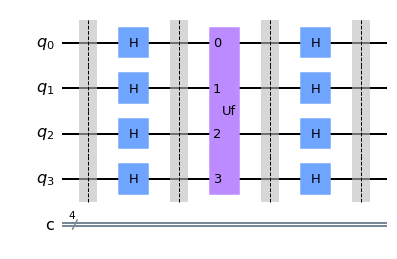

In [7]:
n = 4
circuit = QuantumCircuit(n,n)
circuit.barrier()
circuit.h(range(n))
circuit.barrier()
Uf = QuantumCircuit(n,n)
Uf.name = "Uf"
circuit.append(Uf, range(n))
circuit.barrier()
circuit.h(range(n))
circuit.barrier()
circuit.draw('mpl');

By itself this isn't enough for us to apply the DJA, we need to change it up a bit

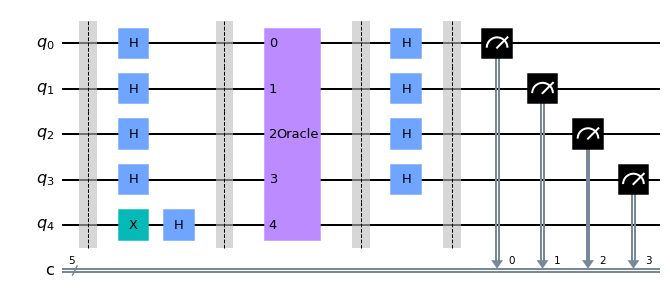

In [9]:
n = 5
circuit = QuantumCircuit(n,n)
circuit.barrier()
circuit.x(n-1)
circuit.h(range(n))
circuit.barrier()
oracle = QuantumCircuit(n,n)
oracle.name = "Oracle"
circuit.append(oracle, range(n))
circuit.barrier()
circuit.h(range(n-1))
circuit.barrier()
circuit.measure(range(n-1),range(n-1))
circuit.draw('mpl');